In [3]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2018-05-14T09:41:03+01:00

CPython 3.6.5
IPython 6.3.1

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores  : 8
interpreter: 64bit


### Intro a peticiones HTTP con Requests

En esta sección vamos a ver como usar la libreria [`requests`](https://github.com/requests/requests), que es la librería mas comunmente utilizada para hacer peticioes HTTP en python. Se instala desde Anaconda o pip (con `pip install requests`)

In [4]:
import requests

### GET Requests

Cuando queremos obtener algo de una página web (un *recurso* como se llaman de forma más técnica), lo que nuestro navegador hace es una petición HTTP de tipo **GET**. 

Por ejemplo, si queremos hacer una petición a meneame.net lo hacemos de forma sencilla de esta forma:

In [5]:
respuesta = requests.get("http://www.meneame.net")

Podemos verificar que la petición ha tenido exito con el atributo `ok`

In [6]:
respuesta.ok

True

Y podemos ver el status de la respuesta con `status_code`

In [7]:
respuesta.status_code

200

En este caso es un **200** por que la petición ha sido recibida con éxito

podemos ver el contenido que nos ha enviado el servidor con `content`

In [8]:
print(respuesta.content)

b'<!DOCTYPE html> <html lang="es" prefix="og: http://ogp.me/ns#">  <head> <meta charset="utf-8" /> <meta name="ROBOTS" content="NOARCHIVE" /> <meta name="generator" content="meneame" /> <meta name="referrer" content="always"> <meta name="viewport" content="width=device-width, initial-scale=1" />  <link href="//fonts.googleapis.com/css?family=Open+Sans:300,400,600,700|Lato:300,400,700|Merriweather:300,300i,700,700i" rel="stylesheet" type="text/css">    <link rel="search" type="application/opensearchdescription+xml" title="b\xc3\xbasqueda" href="https://www.meneame.net/opensearch" /> <link rel="alternate" type="application/rss+xml" title="publicadas" href="//www.meneame.net/rss" /> <link rel="alternate" type="application/rss+xml" title="pendientes" href="//www.meneame.net/rss?status=queued" />   <title>Men\xc3\xa9ame</title> <link rel="stylesheet" href="//maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/

Vemos que la petición a google nos ha devuelto el html de la página de inicio de google. Podemos escribirlo a un archivo y verlo

In [10]:
with open("meneame.html", "wb") as fname:
    fname.write(respuesta.content)

In [11]:
import webbrowser
webbrowser.open("meneame.html")

True

Vemos que la página que hemos obtenido via `requests` no es la misma que la que veríamos desde el navegador. Esto es por que `requests` no sabe como interpretar javascript y dicha página genera los contenidos de forma dinámica.

### Reddit

Supongamos ahora que queremos obtener los 5 primeros posts del foro de comida en Reddit. Podemos hacer una petición a www.reddit.com/r/food (que es la misma url que usariamos en el navegador).

In [12]:
respuesta = requests.get("http://www.reddit.com/r/food")

podemos verificar que la peticion ha sido correcta comprobando el status de la respuesta:

In [13]:
respuesta.ok

False

Oh que sorpresa! La petición no ha funcionado, veamos que status hemos recibido.

In [14]:
respuesta.status_code

429

Sabemos que los códigos http que empiezan por *4xx* significan errores en la petición que hemos hecho. Podemos mirar lo que significa el código 429 en una [lista](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers/User-Agent), o podemos mirar la razon del error con el atributo `reason`

In [15]:
respuesta.reason

'Too Many Requests'

Sin embargo, si abrimos esa dirección web (url) en el navegador funciona sin problemas.

In [16]:
webbrowser.open("www.reddit.com/r/food")

True

Vaya! Nos dice el servidor de reddit que hemos hecho demasiadas peticiones, ¿como puede ser si solo hemos hecho una?. Hemos mencionado que ciertas páginas web tienen un conjunto de contramedidas para evitar bots (programas que pretenden ser usuarios).

Por este motivo, podemos hacer uso de la api que reddit nos proporciona, como dicha api está diseñada para ser consumida por bots, no tendremos problema.

In [17]:
respuesta = requests.get("https://www.reddit.com/r/food/.json?limit=5")

In [18]:
respuesta.ok

True

In [19]:
print(respuesta.content)

b'{"kind": "Listing", "data": {"modhash": "", "dist": 6, "children": [{"kind": "t3", "data": {"is_crosspostable": false, "subreddit_id": "t5_2qh55", "approved_at_utc": null, "wls": 6, "mod_reason_by": null, "banned_by": null, "num_reports": null, "removal_reason": null, "thumbnail_width": null, "subreddit": "food", "selftext_html": "&lt;!-- SC_OFF --&gt;&lt;div class=\\"md\\"&gt;&lt;p&gt;Hello again!\\nWe have seen the quality of this sub grow and we have erased a lot of the spam and reposted/stolen content, thanks to you wonderful users! However, we still have some gaps that we need to close, mainly helping to define what [OC] means. So we have added some tags to clarify. Going forward, all link posts must have &lt;strong&gt;only one&lt;/strong&gt; of the following tags in the title:&lt;/p&gt;\\n\\n&lt;p&gt;&lt;strong&gt;[Homemade]&lt;/strong&gt; - &lt;strong&gt;You made it or someone you know made it.&lt;/strong&gt; This includes all the &amp;quot; I made, from scratch, had a go at, 

la petición de la api viene en formato json, con requests podemos parsearla facilmente:

In [20]:
datos = respuesta.json()

In [22]:
from pprint import pprint

In [23]:
pprint(datos)

{'data': {'after': 't3_8j3o9y',
          'before': None,
          'children': [{'data': {'approved_at_utc': None,
                                 'approved_by': None,
                                 'archived': True,
                                 'author': 'randoh12',
                                 'author_flair_css_class': 'randoh',
                                 'author_flair_template_id': None,
                                 'author_flair_text': 'Baked Cracker',
                                 'banned_at_utc': None,
                                 'banned_by': None,
                                 'can_gild': False,
                                 'can_mod_post': False,
                                 'clicked': False,
                                 'contest_mode': False,
                                 'created': 1476067605.0,
                                 'created_utc': 1476038805.0,
                                 'distinguished': 'moderator',
           

Vemos que datos es un diccionario con la clave `data` y subclave `children` que tiene los posts en una lista. Dentro de cada lista, la clave `title` tiene el titulo del post. Por ejemplo, si queremos el título del segundo post en la lista:

In [26]:
datos['data']['children'][1]['data']['title']

'[homemade] chocolate cupcakes with macarones, Italian buttercream, meringue kisses and roses.'

Asi que si queremos todos los titulos no tenemos más que iterar los posts:

In [27]:
titulos = []
for post in datos['data']['children']:
    titulos.append(post['data']['title'])
    
titulos

['[MOD POST - PSA **UPDATE**] pLEASE SEE THE FOLLOWING RULE CHANGES FOR POSTING LINKS IN THIS SUB.',
 '[homemade] chocolate cupcakes with macarones, Italian buttercream, meringue kisses and roses.',
 '[I Ate] Lemon Meringue Pie',
 '[Homemade] One Dozen Chocolate Chip Cookies',
 '[Homemade] Carbonara',
 '[I Ate] Deep Fried Cheese']

Alternativamente, podemos usar [`glom`](https://github.com/mahmoud/glom) para iterar más rápidamente. **NOTA:** `glom` es una libreria nueva y puede no funcionar de forma estable

In [28]:
from glom import glom
glom(datos, ('data.children', ['data.title']))

['[MOD POST - PSA **UPDATE**] pLEASE SEE THE FOLLOWING RULE CHANGES FOR POSTING LINKS IN THIS SUB.',
 '[homemade] chocolate cupcakes with macarones, Italian buttercream, meringue kisses and roses.',
 '[I Ate] Lemon Meringue Pie',
 '[Homemade] One Dozen Chocolate Chip Cookies',
 '[Homemade] Carbonara',
 '[I Ate] Deep Fried Cheese']

### Yahoo Weather

Podemos usar la [api de Yahoo weather](https://developer.yahoo.com/weather/?guccounter=2) de forma similar a la de reddit

In [29]:
url = """
https://query.yahooapis.com/v1/public/yql?q=select * from weather.forecast where woeid in (select woeid from geo.places(1) where text="{}") and u='c'&format=json
"""

url

'\nhttps://query.yahooapis.com/v1/public/yql?q=select * from weather.forecast where woeid in (select woeid from geo.places(1) where text="{}") and u=\'c\'&format=json\n'

In [30]:
url.format("Murcia, Spain")

'\nhttps://query.yahooapis.com/v1/public/yql?q=select * from weather.forecast where woeid in (select woeid from geo.places(1) where text="Murcia, Spain") and u=\'c\'&format=json\n'

In [33]:
datos = requests.get(url.format("Madrid, Spain")).json()

In [34]:
from pprint import pprint
pprint(datos)

{'query': {'count': 1,
           'created': '2018-05-14T09:55:47Z',
           'lang': 'en-US',
           'results': {'channel': {'astronomy': {'sunrise': '6:59 am',
                                                 'sunset': '9:24 pm'},
                                   'atmosphere': {'humidity': '59',
                                                  'pressure': '31967.52',
                                                  'rising': '0',
                                                  'visibility': '25.91'},
                                   'description': 'Yahoo! Weather for Madrid, '
                                                  'Madrid, ES',
                                   'image': {'height': '18',
                                             'link': 'http://weather.yahoo.com',
                                             'title': 'Yahoo! Weather',
                                             'url': 'http://l.yimg.com/a/i/brand/purplelogo//uh/us/news-wea.gif',
        

In [35]:
from glom import glom
temperaturas = glom(datos, {
    "date": ('query.results.channel.item.forecast', ['date']),
    "high":  ('query.results.channel.item.forecast', ['high']),
    "low":  ('query.results.channel.item.forecast', ['low'])
})

In [36]:
temperaturas

{'date': ['14 May 2018',
  '15 May 2018',
  '16 May 2018',
  '17 May 2018',
  '18 May 2018',
  '19 May 2018',
  '20 May 2018',
  '21 May 2018',
  '22 May 2018',
  '23 May 2018'],
 'high': ['19', '23', '25', '23', '22', '23', '26', '24', '22', '26'],
 'low': ['10', '8', '9', '11', '12', '11', '11', '12', '12', '12']}

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams["figure.figsize"] = (7, 7)

In [38]:
plt.style.use("ggplot")

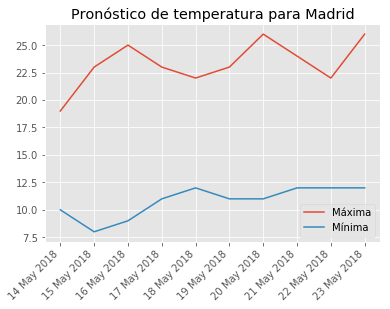

In [39]:
plt.plot(range(len(temperaturas["date"])), temperaturas["high"], 
         label="Máxima")

plt.plot(range(len(temperaturas["date"])), temperaturas["low"], 
         label="Mínima")
plt.xticks(range(len(temperaturas["date"])), temperaturas["date"],
           rotation=45, ha="right")
plt.title("Pronóstico de temperatura para Madrid");
plt.legend();

In [40]:
def dibujar_grafico_temperaturas(temperaturas, ciudad):
    plt.plot(range(len(temperaturas["date"])), temperaturas["high"], 
         label="Máxima")
    plt.plot(range(len(temperaturas["date"])), temperaturas["low"], 
         label="Mínima")
    plt.xticks(range(len(temperaturas["date"])), temperaturas["date"],
           rotation=45, ha="right")
    plt.legend()
    plt.title("Pronóstico de temperatura para {}".format(ciudad));
    
def obtener_temperaturas(ciudad):
    datos = requests.get(url.format(ciudad)).json()
    temperaturas = glom(datos, {
        "date": ('query.results.channel.item.forecast', ['date']),
        "high":  ('query.results.channel.item.forecast', ['high']),
        "low":  ('query.results.channel.item.forecast', ['low'])
    })
    return temperaturas

def grafico_temperaturas(ciudad):
    temperaturas = obtener_temperaturas(ciudad)
    dibujar_grafico_temperaturas(temperaturas, ciudad)

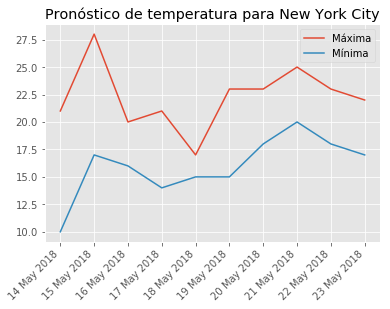

In [42]:
grafico_temperaturas("New York City")